In [31]:
import pandas as pd
from statsmodels.stats.proportion import test_proportions_2indep

In [76]:
ab_data = pd.read_csv('ab_data.csv')
print(len(ab_data))
ab_data.head()

294478


,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [39]:
pd.crosstab(ab_data['landing_page'], ab_data['converted'], margins = True, normalize=True)

converted,0,1,All
landing_page,,,
new_page,0.440580,0.059420,0.5
old_page,0.439761,0.060239,0.5
All,0.880341,0.119659,1.0


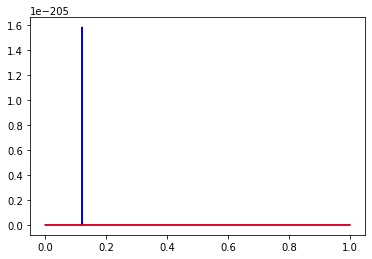

In [70]:
from statistics import mean
import numpy as np
p_0 = mean(ab_data[ab_data['landing_page'] == 'old_page']['converted'])
p_1 = mean(ab_data[ab_data['landing_page'] == 'new_page']['converted'])
sd_0 = p_0 * (1 - p_0) / len(ab_data[ab_data['landing_page'] == 'old_page'])
sd_1 = p_1 * (1 - p_1) / len(ab_data[ab_data['landing_page'] == 'new_page'])
import matplotlib.pyplot as plt 
from scipy.stats import norm 
x_axis = np.arange(0, 1, 0.0001) 
plt.plot(x_axis, norm.pdf(x_axis, p_0, sd_0), color='blue') 
plt.plot(x_axis, norm.pdf(x_axis, p_1, sd_1), color='red') 

In [71]:
print(p_0, sd_0)
print(p_1, sd_1)

0.12047759085568362 7.196649050679107e-07
0.11884079625642663 7.112087246012613e-07


In [34]:
total = len(ab_data)
p_converted_g_new_page = 17498  / len(ab_data[ab_data['landing_page'] == 'new_page'])
p_converted_g_old_page = 17739 / len(ab_data[ab_data['landing_page'] == 'old_page'])
p_new_page = len(ab_data[ab_data['landing_page'] == 'new_page']) / len(ab_data)
p_old_page = len(ab_data[ab_data['landing_page'] == 'old_page']) / len(ab_data)
print("Probability of conversion given new page: ", p_converted_g_new_page)
print("Probability of conversion given old page: ", p_converted_g_old_page)
print("Probability of new page: ", p_new_page)
print("Probability of old page: ", p_old_page)
print("Probability of conversion: ", sum(ab_data['converted']) / len(ab_data))

Probability of conversion given new page:  0.11884079625642663
Probability of conversion given old page:  0.12047759085568362
Probability of new page:  0.5
Probability of old page:  0.5
Probability of conversion:  0.11965919355605512


In [38]:
pd.crosstab(ab_data['group'], ab_data['converted'], margins = True, normalize=True)

converted,0,1,All
group,,,
control,0.439690,0.060184,0.499874
treatment,0.440651,0.059475,0.500126
All,0.880341,0.119659,1.000000


In [37]:
pd.crosstab(ab_data['group'], ab_data['landing_page'], margins = True, normalize=True)

landing_page,new_page,old_page,All
group,,,
control,0.006547,0.493327,0.499874
treatment,0.493453,0.006673,0.500126
All,0.500000,0.500000,1.000000


In [22]:
control = ab_data[ab_data['group'] == 'control']
treat = ab_data[ab_data['group'] == 'treatment']
treat

,user_id,timestamp,group,landing_page,converted
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1
...,...,...,...,...,...
294462,677163,2017-01-03 19:41:51.902148,treatment,new_page,0
294465,925675,2017-01-07 20:38:26.346410,treatment,new_page,0
294468,643562,2017-01-02 19:20:05.460595,treatment,new_page,0
294472,822004,2017-01-04 03:36:46.071379,treatment,new_page,0


In [ ]:
p_converted_g_new_page = 17498  / total
p_converted_g_old_page = 17739 / total
print("Probability of conversion given new page: ", p_converted_g_new_page)
print("Probability of conversion given old page: ", p_converted_g_old_page)
#Wald's test on two proportions
new_page = ab_data[ab_data['landing_page'] == 'new_page']
old_page = ab_data[ab_data['landing_page'] == 'old_page']
_, pvalue = test_proportions_2indep(len(new_page[new_page['converted'] == 1]), 
                        len(new_page),
                        len(old_page[old_page['converted'] == 1]),
                        len(old_page),
                        method = 'wald',
                        return_results=False)
print("Probability that the proportion of conversions by which page is different is: ", pvalue)

In [40]:
import requests

In [45]:
req = requests.get('https://archive.physionet.org/physiobank/database/mimic2cdb-ps/')

In [46]:
req.text

'\n\n<!DOCTYPE html>\n<html lang="en">\n<head>\n<meta charset=utf-8>\n\n    \n\n<title>The MIMIC II Clinical Database (Public Subset)</title>\n<link rel="stylesheet" href="/pn/print.css" type="text/css" media="print">\n<link rel="stylesheet" href="/pn/css/physionet.css" media="all">\n\n<link rel="stylesheet" href="local.css" type="text/css" media="all">\n\n<style>\n#toc, #doi { margin-right: 1em; }\n\n \n \n#toc, #doi { background: #ecf3ff; border: solid 2px #38388B }\n.sf-menu > li > a { background:  #dfe9ff; }\n\nh1, h2, h3 { color: #38388B;\n             background: #dfe9ff; }\na[href^=\'http://127.0.0.1:280\']\n { background: none; padding-right: 0; }\n</style>\n<script src="/pn/js/jquery.min.js"></script>\n<script src="/pn/js/hoverIntent.js"></script>\n<script src="/pn/js/superfish.min.js"></script>\n<script src="/pn/js/accessible-superfish.js"></script>\n<script src="/pn/js/physionet.js"></script>\n<script src="/pn/js/jquery.tableofcontents.min.js"></script>\n<script>\n  $(docume

In [60]:
url = 'https://archive.physionet.org/physiobank/database/mimic2cdb-ps/'
import re

In [62]:
result = re.findall("href=\"(s\d+/)\"", req.text)

In [55]:
for res in result:
    re.get()

[]

In [64]:
req0 = requests.get(url + result[0])
req0.text

"<html><head><title>Log for record s00318</title></head>\n<body bgcolor=#ffffff><a name=s><h1>Log for record s00318</h1></a>\n<p>This log is also available as text (<a href=s00318.txt>s00318.txt</a>) and as a (binary) annotation file (<a href=s00318.log>s00318.log</a>).\n<p>Generated: Monday, 07-Jun-2010 13:20:11 EDT<br>(All dates below are surrogates.)<hr>\n<a name=0><b>[00:00:00 14/07/2009]</b></a> <a href=#s>start</a> <a href=#-1>prev</a> <a href=#1>next</a> <a href=#e>end</a>\n<ul>\n<li>Waveform Record\n<pre>\nt0: [07:15:59 14/07/2009]\ntf: [20:02:13 14/07/2009]\nid: <a href=/physiobank/database/mimic2db/a40802/>a40802</a> [<a href=/cgi-bin/ATM?database=mimic2db&record=a40802/a40802>view</a>]\n</pre>\n<li>Numerics Record\n<pre>\nt0: [05:43:59 14/07/2009]\ntf: [06:56:59 16/07/2009]\nid: <a href=/physiobank/database/mimic2db/a40802/>a40802n</a> [<a href=/cgi-bin/ATM?database=mimic2db/numerics&record=a40802n>view</a>]\n</pre>\n<li>ICD9\n<pre>\ndd: 41071\nds: 1\nld: AMI, SUBENDOCARD IN

In [74]:
pd.read_csv('mimic3d.csv')

,hadm_id,gender,age,LOSdays,admit_type,admit_location,AdmitDiagnosis,insurance,religion,marital_status,...,NumMicroLabs,NumNotes,NumOutput,NumRx,NumProcEvents,NumTransfers,NumChartEvents,ExpiredHospital,TotalNumInteract,LOSgroupNum
0,100001,F,35,6.17,EMERGENCY,CLINIC REFERRAL/PREMATURE,DIABETIC KETOACIDOSIS,Private,PROTESTANT QUAKER,DIVORCED,...,0.65,0.05,5.19,14.91,1.13,0.65,398.70,0,493.89,1
1,100003,M,59,4.04,EMERGENCY,EMERGENCY ROOM ADMIT,UPPER GI BLEED,Private,NOT SPECIFIED,SINGLE,...,1.24,1.59,5.45,7.18,0.99,1.24,373.02,0,465.71,1
2,100006,F,48,12.04,EMERGENCY,EMERGENCY ROOM ADMIT,COPD FLARE,Private,NOT SPECIFIED,SINGLE,...,0.33,0.15,4.15,6.23,0.00,0.33,286.21,0,344.00,3
3,100007,F,73,7.29,EMERGENCY,EMERGENCY ROOM ADMIT,BOWEL OBSTRUCTION,Private,JEWISH,MARRIED,...,0.69,0.17,9.05,11.52,0.00,0.96,526.06,0,603.05,1
4,100009,M,60,4.88,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,CORONARY ARTERY DISEASE,Private,CATHOLIC,MARRIED,...,0.61,0.34,16.19,25.00,2.87,2.05,554.92,0,679.84,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58971,199993,M,60,24.58,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,CORONARY ARTERY DISEASE,Private,CATHOLIC,DIVORCED,...,0.20,0.13,23.11,8.01,0.00,0.08,1315.46,0,1746.31,3
58972,199994,F,58,9.75,EMERGENCY,EMERGENCY ROOM ADMIT,MENTAL STATUS CHANGES,Medicare,CATHOLIC,SINGLE,...,2.26,0.30,7.90,0.00,0.00,0.31,674.05,0,834.98,2
58973,199995,M,23,16.75,EMERGENCY,PHYS REFERRAL/NORMAL DELI,ROOT ABSCESS,Private,PROTESTANT QUAKER,SINGLE,...,0.54,0.10,6.27,5.79,0.00,0.36,207.10,0,261.30,3
58974,199998,M,69,5.88,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,CORONARY ARTERY DISEASE,Medicare,CATHOLIC,MARRIED,...,0.17,0.35,12.24,17.69,0.00,1.02,426.87,0,537.42,1
